## Le deep learning

Aujourd'hui, il existe beaucoup de produits dit "d'Intelligence Artificielle (IA)", ces applications utilisent majoritairement du Machine Learning (ML), qui est un sous-domaine de l'IA, comme vous pouvez le voir ci-dessous. Le machine learning est un champ d'étude qui permet à des programmes de pouvoir résoudre des problèmes à partir de données sans les avoir explicitement programmé. Le deep learning est seulement un des nombreux algorithmes d'apprentissage du machine learning. 

<img src="data/intelligence_artificielle.png" width="400">

Ici, nous allons nous concentrer sur les problèmatiques d'apprentissage supervisé. Nous allons avoir un jeu de données avec des variables explicatives A et des labels B. Le but de notre algorithme, sera d'apprendre à transformer A en B. Comme vous pouvez le voir ci-dessous, la première étape sera l'entraînement, où l'on donnera des données d'entraînement A et B à un algorithme d'apprentissage. Une fois l'entraînement terminé, l'algorithme nous donne un modèle mathématique. Ce modèle pourra prendre des nouvelles données A' afin de pouvoir estimer leurs résultats B'

<img src="data/machine_learning.png" width="600">


Le deep learning est un algorithme de machine learning basé sur des neurones artificielles. Ces neurones sont des unités de calculs, ils prennt en entrée des informations, les transforment en une valeur et transmettent cette valeur à d'autres neurones.

<img src ="data/neurone.png" width="600" >

Vous pouvez le voir ci-dessous, si l'on met des neurones artificielles en réseau, nous obtenons un réseau de neurones qui permet de prendre en entrée des données A et de changer la représentation de ces données afin de pouvoir transformer plus facilement A en B.

<img src ="data/réseau_de_neurones.png" width="600" >

Initiallement, cet algorithme était censé représenter artificiellement le comportement du cerveau humain. Aujourd'hui, son fonctionnement est bien loin du fonctionnement du cerveau humain même s'il y a encore du vocabulaire hérité de cette inspiration biologique.

L'avantage du deep learning réside dans la superposition de couches. Cette superposition permet de changer la représentation des données d'entrées de notre réseau pour mettre en valeur différenes caractéristiques de notre jeux de données. Cette nouvelle représentation est élaboré afin de résoudre notre problème plus efficacement. Comme vous pouvez le voir ci-dessous, ça remplace en partie le processus de feature engineering indispensable aux modèles de machines learning classique. 

<img src ="data/ml_vs_dl.png" width="700" >

Cette force, a permi le développement d'algorithme de deep learning très robuste capable de mieux comprendre les données non structurés tels que du texte, du son et des images.

## Les architectures de Convolutional Neural Network (CNN)

Comme vous l'avons vue précédemment, le principal avantage des réseaux de neurones par rapport aux algorithmes de machine learning traditionnels est que les algorithmes de deep learning apprennent des représentations par eux-mêmes, alors que dans le machine learning traditionnel, on créé des variables à la main sensé être une meilleure représentation des données. Eh bien, c'est vrai pour les réseaux de neurones de type "fully connceted" qui ne sont constitués que de couches entièrement connectées. Mais il est très difficile de les entraîner pour des entrées de haute dimension comme les images.

Lorsque vous utilisez une architecture de CNN, vous utilisez deux types de fonctionnalités artisanales : les convolutional layers (les filtres de convolution) et les poolign layers (les filtres de regroupement).

Le concepteur du CNN pour la classification des images a examiné les données d'entrée (c'est ce que font les ingénieurs en machine learning traditionnels pour inventer des fonctionnalités) et a décidé que des patchs de pixels proches les uns des autres contiennent des informations qui pourraient aider à la classification, et en même temps réduire le nombre de paramètres. Vous pouvez voir l'application d'un patch sur une image ci-dessous.

<img src="data/application_de_patchs.gif" width="500" >

En effet, l'application de patchs sur une image permet de transformer l'image et de faire ressortir certaines de ces caractéristiques comme vous pouvez le voir ci-dessous.

<img src="data/filters.png" width="500" >

Le but du CNN est de transformer notre image de départ en vecteur qui serait la représentation vectorielle des caractéristiques de notre image. 

<img src="data/conv_nn.png" width="600" >

Une fois que nous avons extrait les caractéristiques de notre image sous forme de vecteur, nous pouvons utiliser cette représentation afin de résoudre un problème lié à notre image. Sur l'illustration ci-dessous, vous pouvez bien voir les deux différentes parties qui consistuent notre réseau. 

<img src="data/CNN.png" width="800" >

## Exemple CNN

Ne vous inquiétez pas, vous n'allez pas avoir besoin de connaître toutes les mathématiques qui se cachent derrière les réseaux convolutionel pour pouvoir les utiliser. 
Grâce à Tensorflow et sa sur-couche Keras, vous pouvez construire un modèle en quelques cliques.

### Importation des packages

On va commencer par importer les packages nécessaires à l'élaboration de notre modèle.

In [66]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


### Importations des données

Maintenant que nos outils sont chargés, nous allons charger nos données.

In [67]:
train_dataset = h5py.File('data/train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('data/test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

classes = np.array(test_dataset["list_classes"][:]) 
  
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

input_shape = train_set_x_orig[0].shape

Dans cet exemple, nous allons créer un modèle de deep learning capable de reconnaître quel chiffre fait la main une photo. Comme vous pouvez le voir ci-dessous, nous avons 5 classes. 

<img src="data/signes.png" width="800" >

Vous pouvez directement voir les exemples depuis le jeu de données.

y = 5


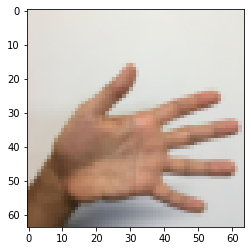

In [68]:
# Example of a picture
index = 0
plt.imshow(train_set_x_orig[index])
print ("y = " + str(np.squeeze(train_set_y_orig[:, index])))

Vous pouvez voir ci-dessous que nos images sont en trois dimensions 64 x 64 x 3.

La première dimension de 64 correspond à la hauteur en pixel de la photo, ici 64 pixels.

La deuxième dimension de 64 correspond à la largeur en pixel de la photo, ici 64 pixels.

La troisième dimension correspond aux intensités de rouge, de vert et de bleu nécessaire pour former la couleur du pixel.

<img src="data/RGB-color-model.jpg" width="300" >

In [69]:
print(train_set_x_orig[0].shape)

(64, 64, 3)


Pour créer des images en informatique, il n'y a pas une intensité par couleur, ce serait trop complexe à organiser. Pour remédier à cela, nous avons pris trois couleurs (rouge, vert et bleu) et chaque couleur sera une combinaison d'intensité de ces trois couleurs. Le schéma ci-dessous va sûrement vous aider à comprendre le problème. 

<img src="data/image_en_rgb.png" width="600" >

### Normalisation

Pour des raisons d'optimisation, nous voulons que les données d'entrées de notre modèle soient petit, voir compris entre 0 et 1.

La bonne nouvelle, c'est que les intensités d'une image sont toujours comprises entre 0 et 255. Nous allons donc utiliser la min-max normalisation afin de réduire la valeur des intensités de nos images.

In [107]:
print('Valeur maximum de nos images : ',np.min(train_set_x_orig))
print('Valeur minimum de nos images : ', np.max(train_set_x_orig))

X_train = train_set_x_orig.astype('float32')/255
X_test = test_set_x_orig.astype('float32')/255

print('Valeur maximum de nos images normalisées : ',np.min(X_train))
print('Valeur minimum de nos images normalisées : ',np.max(X_train))

Valeur maximum de nos images :  4
Valeur minimum de nos images :  244
Valeur maximum de nos images normalisées :  0.015686275
Valeur minimum de nos images normalisées :  0.95686275


Dans nos vecteurs "train_set_y_orig" et "test_set_y_orig" nous avons le chiffre correspond à l'image de la main.

Nous allons transformer nos valeurs en hot vecteur, c'est-à-dire au lieu d'avoir la valeur 5 on aura un vecteur avec un 1 à la 5ème case. 

<img src="data/hot_vecteur.png" width="800" >

In [108]:
print(train_set_y_orig.shape)
print(test_set_y_orig.shape)

(1, 1080)
(1, 120)


In [127]:
Y_train = np.eye(6)[train_set_y_orig.reshape(-1)]
Y_test = np.eye(6)[test_set_y_orig.reshape(-1)]
#Y_train = train_set_y_orig.reshape(1080,)
#Y_test = test_set_y_orig.reshape(120,)
print(Y_train[150, :])
print((train_set_y_orig[:, 150]))

[0. 0. 0. 1. 0. 0.]
[3]


### Construction de notre modèle

Ici nous allons créer un modèle basique de CNN.

In [142]:
model = Sequential()

Nous allons commencer notre modèle par une couche de convolution. Comme vous pouvez voir ci-dessous, c'est simplement l'application d'un filtre sur notre image pour extraire des caractéristiques.

<img src="data/convolution_anim.gif" width="800" >

In [143]:
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))

Nous allons maintenant ajouter une couche de max-pooling. Comme vous pouvez voir ci-dessous, c'est simplement la sélection de l'intensité la plus grande parmi une sélection de pixels.

<img src="data/pooling_anim.gif" width="800" >

In [144]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Maintenant que nous avons extrait des informations de notre image, nous allons transformer ces représentations en vecteur.

<img src="data/flatten.gif" width="500" >

In [145]:
model.add(Flatten())

Pour finir, nous allons utiliser des couches entièrement connectées pour prédire l'appartenance de nos observations à nos classes.

<img src="data/fully_connected.png" width="500" >

In [146]:
model.add(Dense(6, activation='softmax'))

Notre modèle est assemblé, nous pouvons maintenant le visualiser.

In [147]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 172806    
Total params: 182,950
Trainable params: 182,950
Non-trainable params: 0
_________________________________________________________________


Voici une représentation plus visuelle du modèle.

<img src="data/baseline.png" width="800" >

Nous voilà à la dernière étape, l'entraînement de notre modèle.

In [150]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=learning_rate), metrics=["accuracy"])
model.fit(X_train, Y_train,
          epochs = 100,
          validation_data=(X_test, Y_test))

Train on 1080 samples, validate on 120 samples
Epoch 1/100
1080/1080 [==============================] - 0s 344us/sample - loss: 0.2273 - acc: 0.9500 - val_loss: 0.6360 - val_acc: 0.7500
Epoch 2/100
1080/1080 [==============================] - 0s 217us/sample - loss: 0.2237 - acc: 0.9481 - val_loss: 0.6614 - val_acc: 0.7750
Epoch 3/100
1080/1080 [==============================] - 0s 241us/sample - loss: 0.2010 - acc: 0.9528 - val_loss: 0.5309 - val_acc: 0.8167
Epoch 4/100
1080/1080 [==============================] - 0s 245us/sample - loss: 0.1546 - acc: 0.9759 - val_loss: 0.5613 - val_acc: 0.7500
Epoch 5/100
1080/1080 [==============================] - 0s 244us/sample - loss: 0.1731 - acc: 0.9463 - val_loss: 0.5381 - val_acc: 0.8083
Epoch 6/100
1080/1080 [==============================] - 0s 243us/sample - loss: 0.1082 - acc: 0.9898 - val_loss: 0.5580 - val_acc: 0.8417
Epoch 7/100
1080/1080 [==============================] - 0s 243us/sample - loss: 0.1165 - acc: 0.9787 - val_loss: 0.519

Pour finir ce notebook, nous allons sauvegarder les paramètres de notre modèle si nous voulons l'utiliser à nouveau plus tard.

In [151]:
model.save_weights("model.h5")